In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# Load train and test data
df1 = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
df2 = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.shape

(1852394, 23)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000,1852394,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394,1852394.000,1852394.000,1852394.000,1852394.000
mean,537193.440,2020-01-20 21:31:46.801827328,417386038393710400.000,70.064,48813.258,38.539,-90.228,88643.675,1973-10-15 11:05:05.744458256,1358674218.834,38.539,-90.228,0.005
min,0.000,2019-01-01 00:00:18,60416207185.000,1.000,1257.000,20.027,-165.672,23.000,1924-10-30 00:00:00,1325376018.000,19.027,-166.672,0.000
25%,231549.000,2019-07-23 04:13:43.750000128,180042946491150.000,9.640,26237.000,34.669,-96.798,741.000,1962-08-13 00:00:00,1343016823.750,34.740,-96.899,0.000
50%,463098.000,2020-01-02 01:15:31,3521417320836166.000,47.450,48174.000,39.354,-87.477,2443.000,1975-11-30 00:00:00,1357089331.000,39.369,-87.441,0.000
75%,833575.750,2020-07-23 12:11:25.249999872,4642255475285942.000,83.100,72042.000,41.940,-80.158,20328.000,1987-04-23 00:00:00,1374581485.250,41.956,-80.245,0.000
max,1296674.000,2020-12-31 23:59:34,4992346398065154048.000,28948.900,99921.000,66.693,-67.950,2906700.000,2005-01-29 00:00:00,1388534374.000,67.510,-66.951,1.000
std,366910.960,NaN,1309115265318020352.000,159.254,26881.846,5.071,13.748,301487.618,NaN,18195081.388,5.106,13.760,0.072


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
# Count the occurrences of each value in the 'is_fraud' column
fraud_counts = df['is_fraud'].value_counts().reset_index()
fraud_counts.columns = ['is_fraud', 'count']

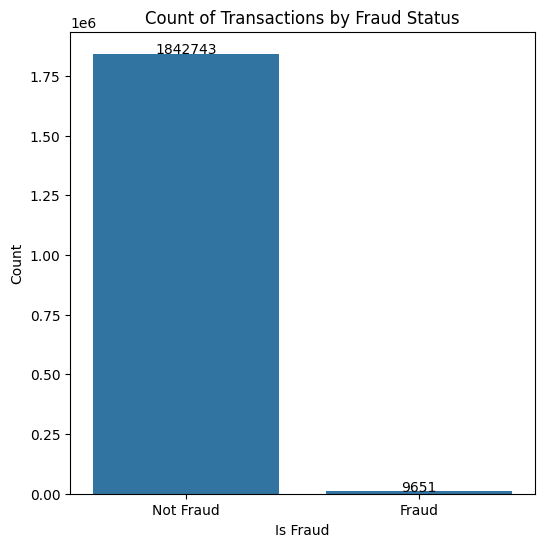

In [ ]:
# Create the countplot
plt.figure(figsize=(6, 6))
sns.barplot(x='is_fraud', y='count', data=fraud_counts)

# Add the count values on top of the bars
for index, row in fraud_counts.iterrows():
    plt.text(row.name, row['count'], str(row['count']), color='black', ha="center")

plt.title('Count of Transactions by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()

In [ ]:
fraud_counts

,is_fraud,count
0,0,1842743
1,1,9651


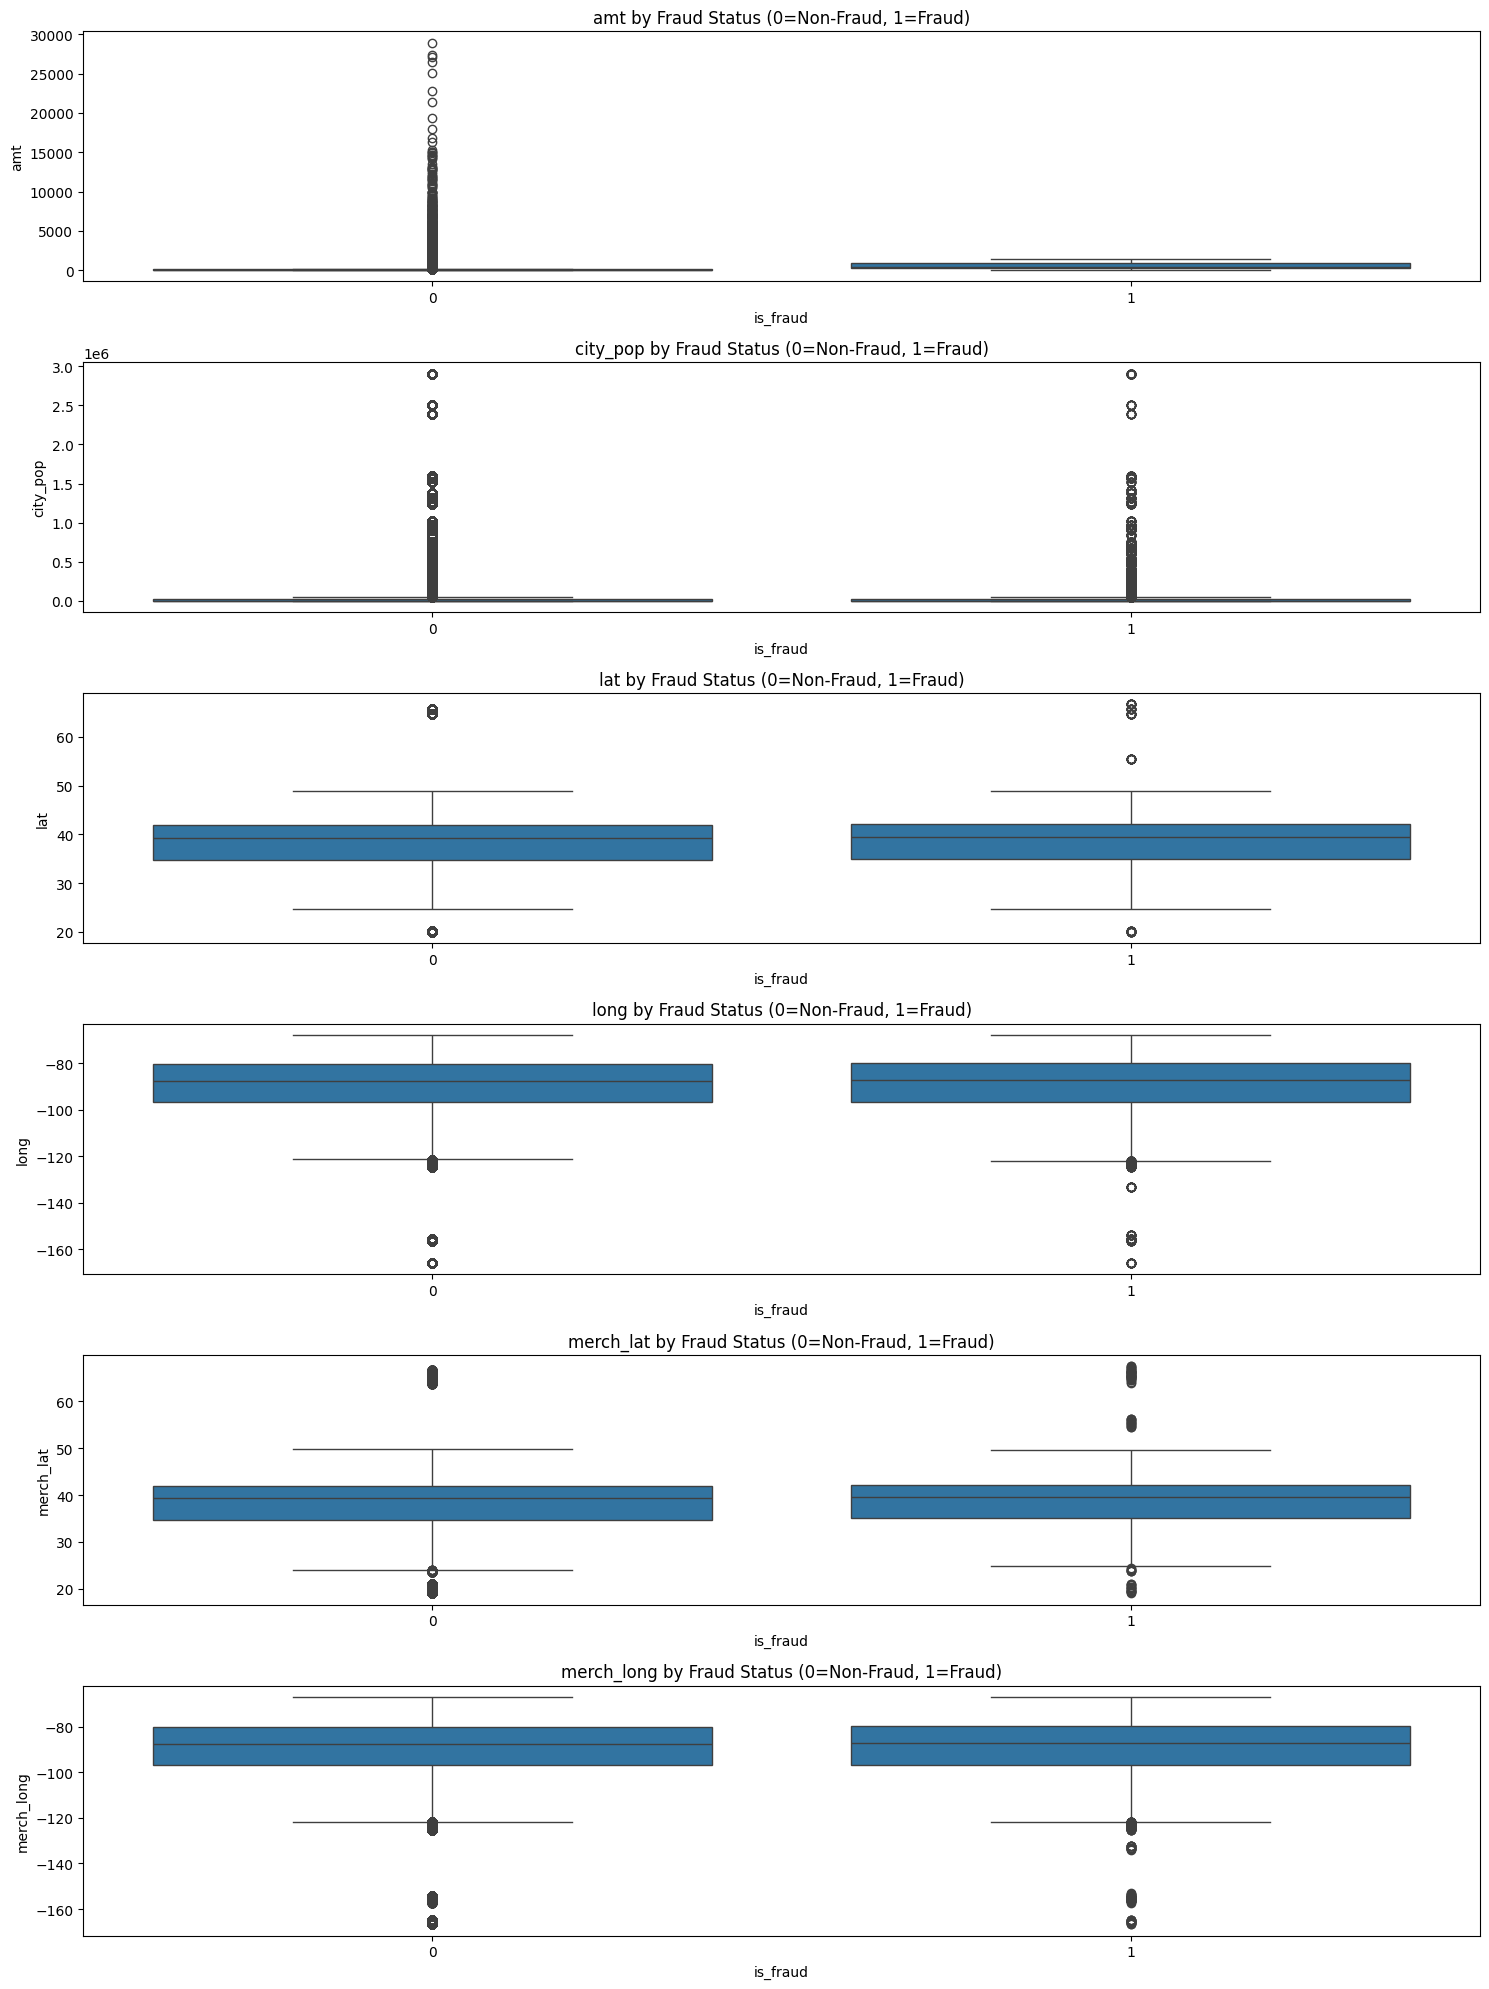

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns (except is_fraud itself)
numeric_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

# Plot boxplots grouped by is_fraud
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df, x='is_fraud', y=col)
    plt.title(f'{col} by Fraud Status (0=Non-Fraud, 1=Fraud)')
    plt.xlabel('is_fraud')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

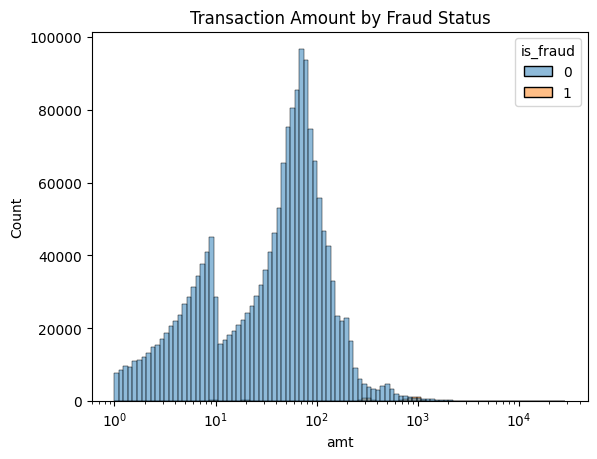

In [ ]:
sns.histplot(data=df, x='amt', hue='is_fraud', bins=100, log_scale=True)
plt.title('Transaction Amount by Fraud Status')
plt.show()

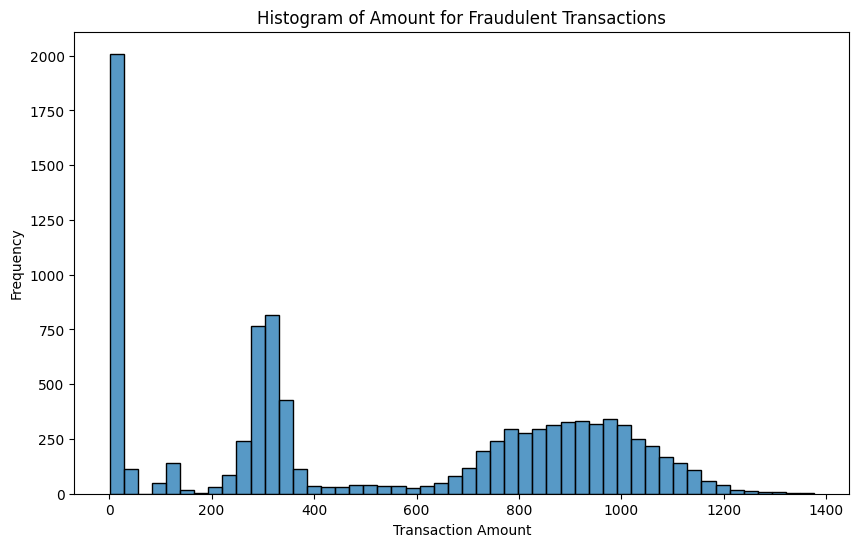

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for fraud transactions
fraud_amt = df[df['is_fraud'] == 1]['amt']

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(fraud_amt, bins=50, kde=False)
plt.title('Histogram of Amount for Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

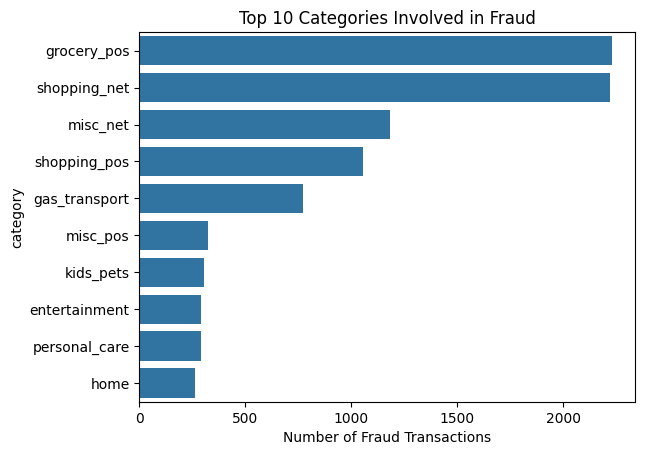

In [ ]:
top_fraud_cats = df[df['is_fraud'] == 1]['category'].value_counts().head(10)

sns.barplot(x=top_fraud_cats.values, y=top_fraud_cats.index)
plt.title("Top 10 Categories Involved in Fraud")
plt.xlabel("Number of Fraud Transactions")
plt.show()

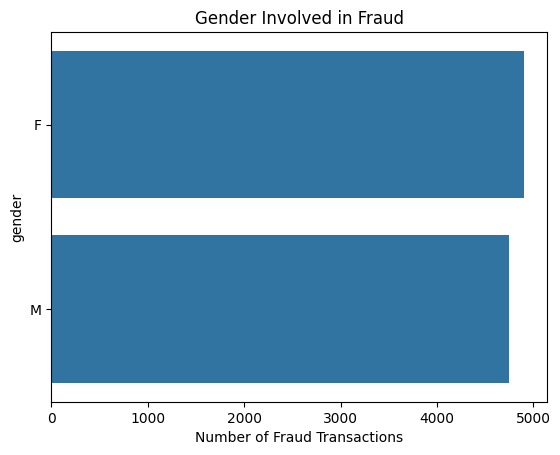

In [ ]:
top_fraud = df[df['is_fraud'] == 1]['gender'].value_counts()

sns.barplot(x=top_fraud.values, y=top_fraud.index)
plt.title("Gender Involved in Fraud")
plt.xlabel("Number of Fraud Transactions")
plt.show()

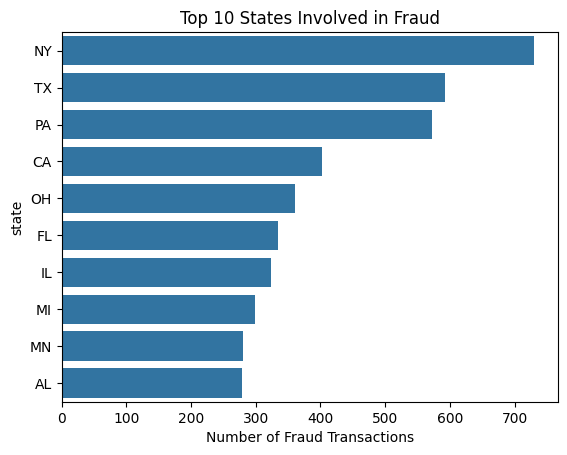

In [ ]:
top_fraud_cats = df[df['is_fraud'] == 1]['state'].value_counts().head(10)

sns.barplot(x=top_fraud_cats.values, y=top_fraud_cats.index)
plt.title("Top 10 States Involved in Fraud")
plt.xlabel("Number of Fraud Transactions")
plt.show()

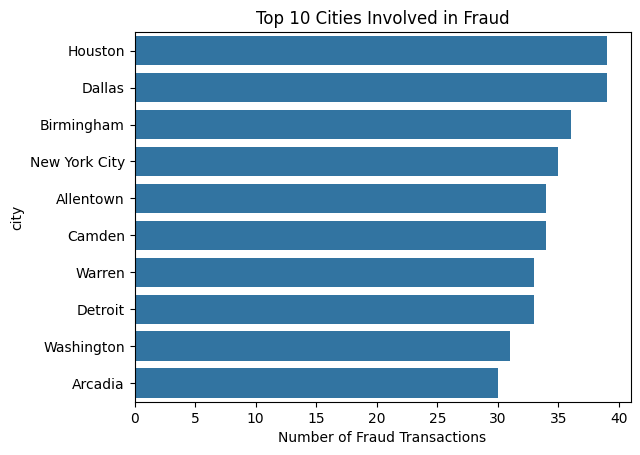

In [ ]:
top_fraud_cats = df[df['is_fraud'] == 1]['city'].value_counts().head(10)

sns.barplot(x=top_fraud_cats.values, y=top_fraud_cats.index)
plt.title("Top 10 Cities Involved in Fraud")
plt.xlabel("Number of Fraud Transactions")
plt.show()

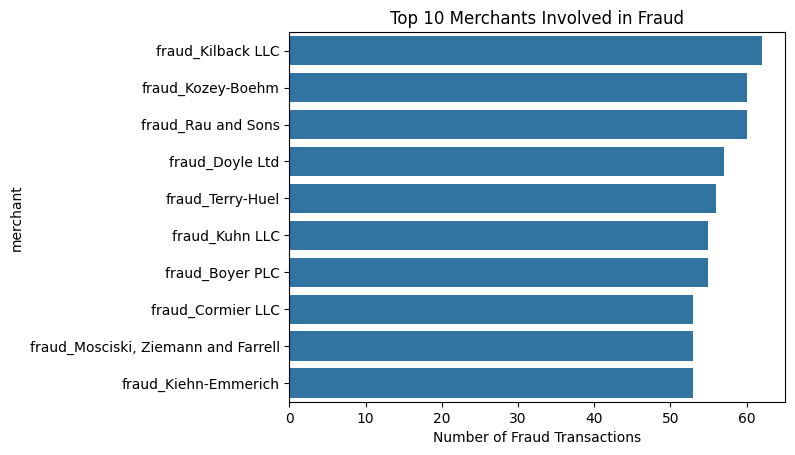

In [ ]:
top_fraud_cats = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)

sns.barplot(x=top_fraud_cats.values, y=top_fraud_cats.index)
plt.title("Top 10 Merchants Involved in Fraud")
plt.xlabel("Number of Fraud Transactions")
plt.show()

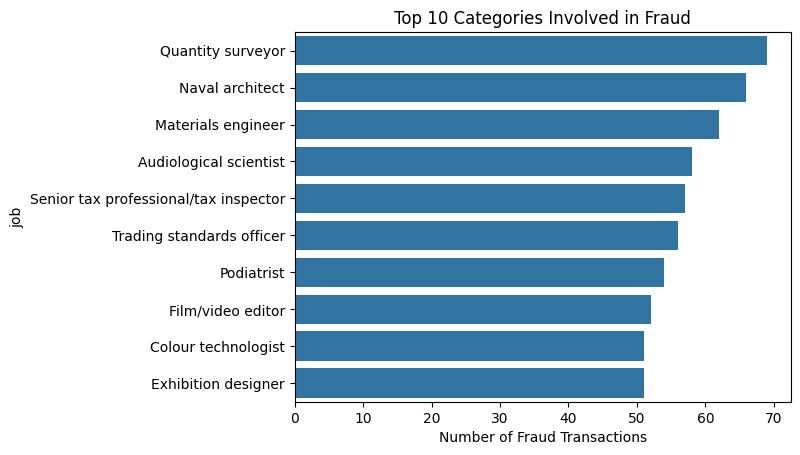

In [ ]:
top_fraud_cats = df[df['is_fraud'] == 1]['job'].value_counts().head(10)

sns.barplot(x=top_fraud_cats.values, y=top_fraud_cats.index)
plt.title("Top 10 Categories Involved in Fraud")
plt.xlabel("Number of Fraud Transactions")
plt.show()

In [ ]:
# Create helper columns
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Filter only fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

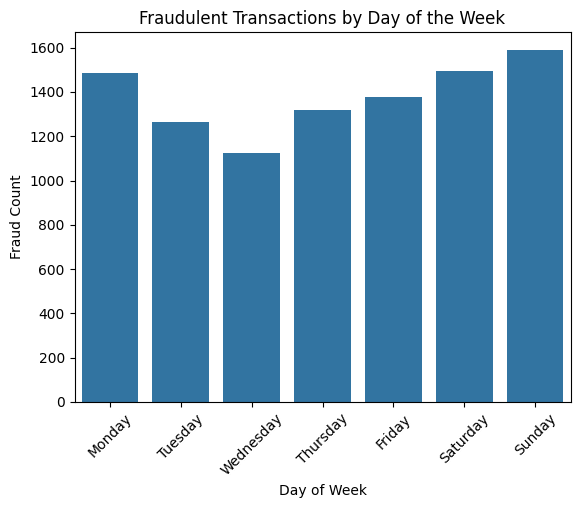

In [ ]:

# Plot
sns.countplot(data=fraud_df, x='trans_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Fraudulent Transactions by Day of the Week")
plt.ylabel("Fraud Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

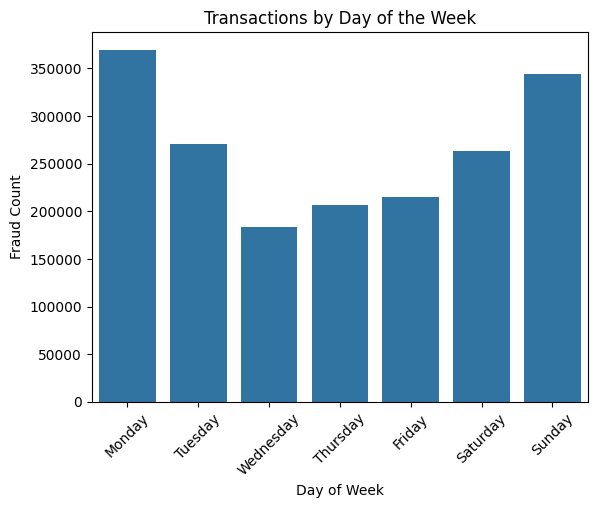

In [ ]:
# Plot
sns.countplot(data=df, x='trans_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Transactions by Day of the Week")
plt.ylabel("Fraud Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

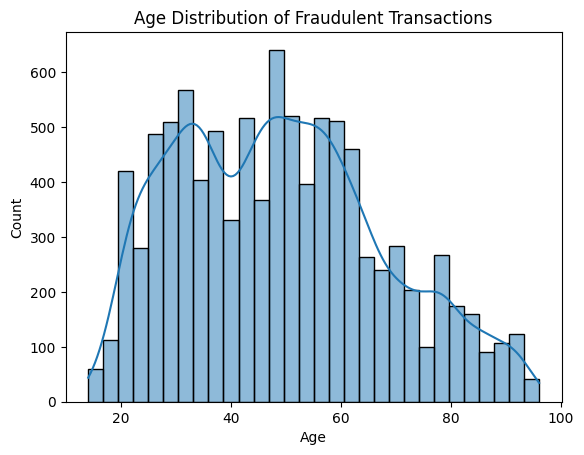

In [ ]:
sns.histplot(data=df[df['is_fraud'] == 1], x='age', bins=30, kde=True)
plt.title("Age Distribution of Fraudulent Transactions")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

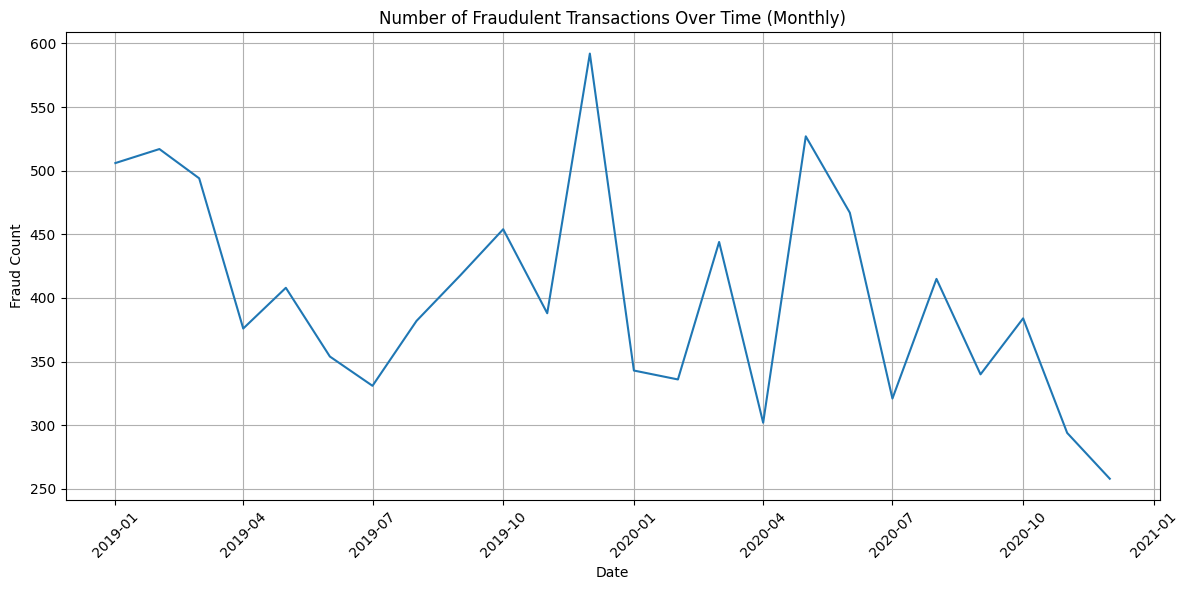

In [ ]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Filter for fraud transactions
fraud_df = df[df['is_fraud'] == 1]

# Group by year-month and count fraud transactions
fraud_by_month_year = fraud_df.groupby('year_month').size().reset_index(name='fraud_count')

# Convert year_month back to datetime for plotting
fraud_by_month_year['year_month'] = fraud_by_month_year['year_month'].dt.to_timestamp()

# Create the time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=fraud_by_month_year, x='year_month', y='fraud_count')
plt.title('Number of Fraudulent Transactions Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

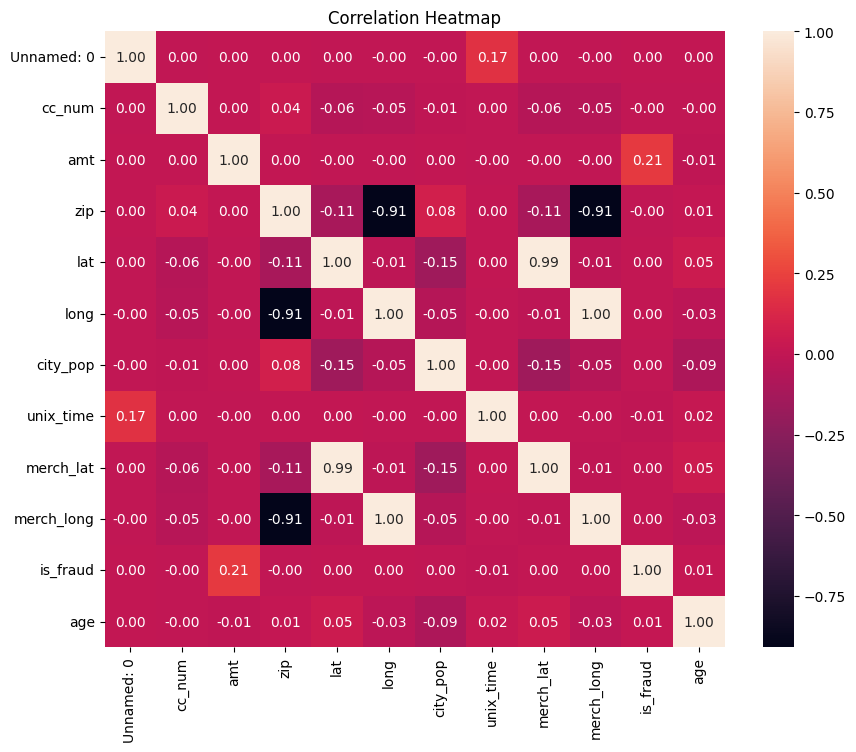

In [ ]:
numeric_df = df.select_dtypes(include=['number'])  # select only numeric columns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import radians, cos, sin, asin, sqrt

# 1. Convert date columns to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')  # assuming format like '21-06-1978'

# 2. Create time-based features
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_dayofweek'] = df['trans_date_trans_time'].dt.day_name()

# 3. Calculate customer age
df['customer_age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year  # or use current year dynamically

# 4. Calculate distance between customer and merchant
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

df['distance_to_merchant'] = df.apply(lambda row:
    haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Preview new features
df[['transaction_hour', 'transaction_dayofweek', 'customer_age', 'distance_to_merchant']].head()


,transaction_hour,transaction_dayofweek,customer_age,distance_to_merchant
0,0,Tuesday,31,78.598
1,0,Tuesday,41,30.212
2,0,Tuesday,57,108.206
3,0,Tuesday,52,95.673
4,0,Tuesday,33,77.557


In [ ]:
cols_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
    'first', 'last', 'street', 'city', 'zip', 'lat', 'long',
    'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
    'trans_day','year_month'
]
df.drop(columns=cols_to_drop, inplace=True)

# === Step 4: Encode categorical variables ===
df['category'] = df['category'].astype('category').cat.codes
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['job'] = df['job'].astype('category').cat.codes
df['transaction_dayofweek'] = df['transaction_dayofweek'].astype('category').cat.codes
df['state'] = df['state'].astype('category').cat.codes

# === Final Check ===
print(df.head())
print("\nEncoded columns:", df.columns.tolist())

   category     amt  gender  state  city_pop  job  is_fraud  age  \
0         8   4.970       1     27      3495  372         0   31   
1         4 107.230       1     47       149  431         0   41   
2         0 220.110       0     13      4154  308         0   57   
3         2  45.000       0     26      1939  330         0   52   
4         9  41.960       0     45        99  116         0   33   

   transaction_hour  transaction_dayofweek  customer_age  distance_to_merchant  
0                 0                      5            31                78.598  
1                 0                      5            41                30.212  
2                 0                      5            57               108.206  
3                 0                      5            52                95.673  
4                 0                      5            33                77.557  

Encoded columns: ['category', 'amt', 'gender', 'state', 'city_pop', 'job', 'is_fraud', 'age', 'transacti

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['is_fraud'])  # after encoding
y = df['is_fraud']

# Ensure categorical variables are encoded first
# e.g., using pd.get_dummies or LabelEncoder if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_balanced.value_counts())


Before SMOTE: is_fraud
0    1474194
1       7721
Name: count, dtype: int64
After SMOTE: is_fraud
0    1474194
1    1474194
Name: count, dtype: int64


In [ ]:
X_train_balanced.head()

,category,amt,gender,state,city_pop,job,age,transaction_hour,transaction_dayofweek,customer_age,distance_to_merchant
0,7,75.720,1,34,2504700,292,21,15,1,21,52.771
1,2,79.740,1,4,2383912,259,60,10,5,60,68.182
2,6,74.920,0,26,1446,70,42,20,1,42,66.904
3,2,44.300,1,14,2135,376,16,0,2,16,65.196
4,6,28.020,0,20,626,151,60,18,2,60,71.833


In [ ]:
import xgboost as xgb

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.95      0.82      0.88      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.91      0.94    370479
weighted avg       1.00      1.00      1.00    370479



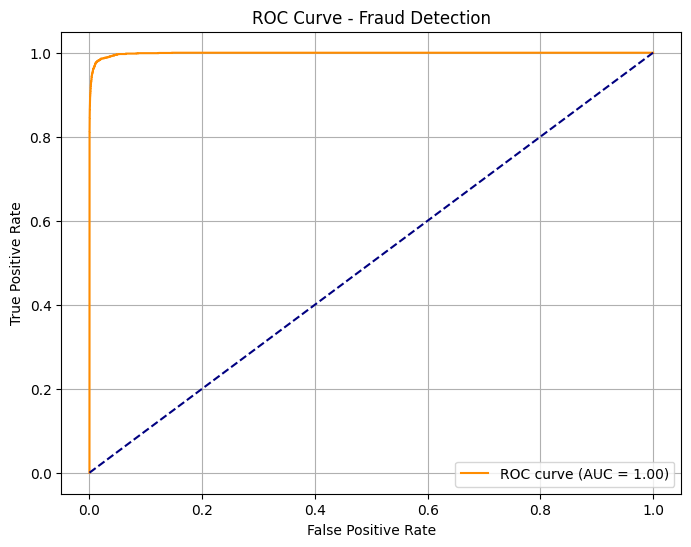

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Fraud Detection')
plt.legend(loc='lower right')
plt.grid()
plt.show()

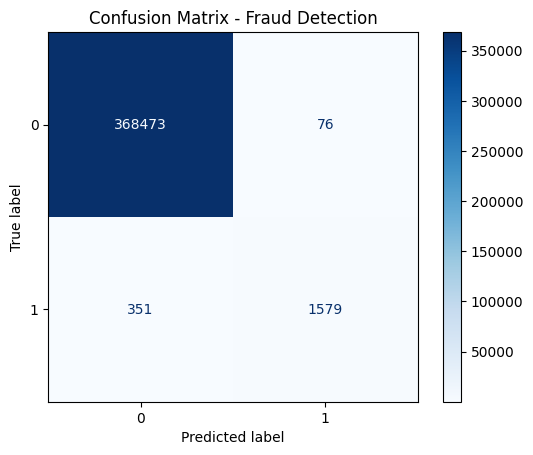

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Fraud Detection")
plt.show()

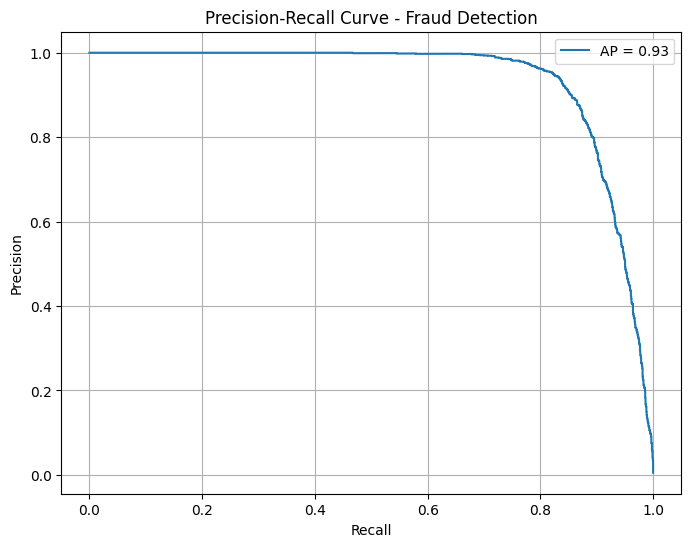

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (fraud)
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Assuming model is your trained classifier

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Fraud Detection')
plt.legend()
plt.grid(True)
plt.show()

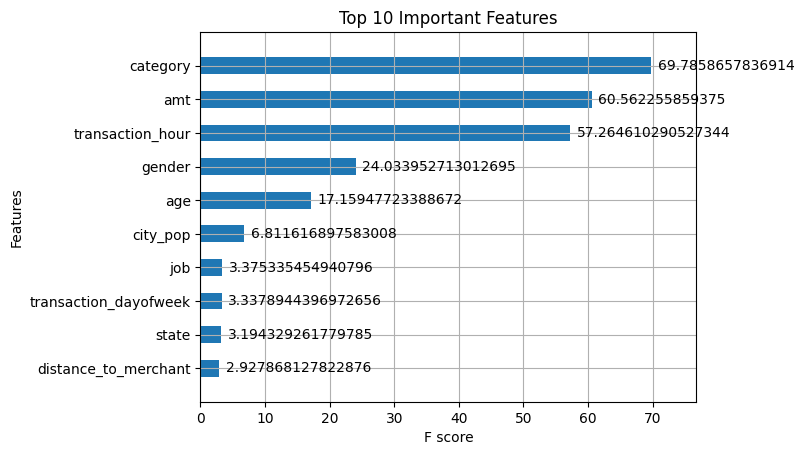

In [ ]:
import xgboost as xgb
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Predict probabilities instead of labels
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Choose a lower threshold, e.g., 0.3
threshold = 0.38
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate with new threshold
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))

Confusion Matrix:
 [[368434    115]
 [   313   1617]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.93      0.84      0.88      1930

    accuracy                           1.00    370479
   macro avg       0.97      0.92      0.94    370479
weighted avg       1.00      1.00      1.00    370479



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Evaluate
y_pred_best = best_dt.predict(X_test)

from sklearn.metrics import classification_report
print("Tuned Decision Tree Report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Tuned Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.94      0.82      0.87      1930

    accuracy                           1.00    370479
   macro avg       0.97      0.91      0.94    370479
weighted avg       1.00      1.00      1.00    370479



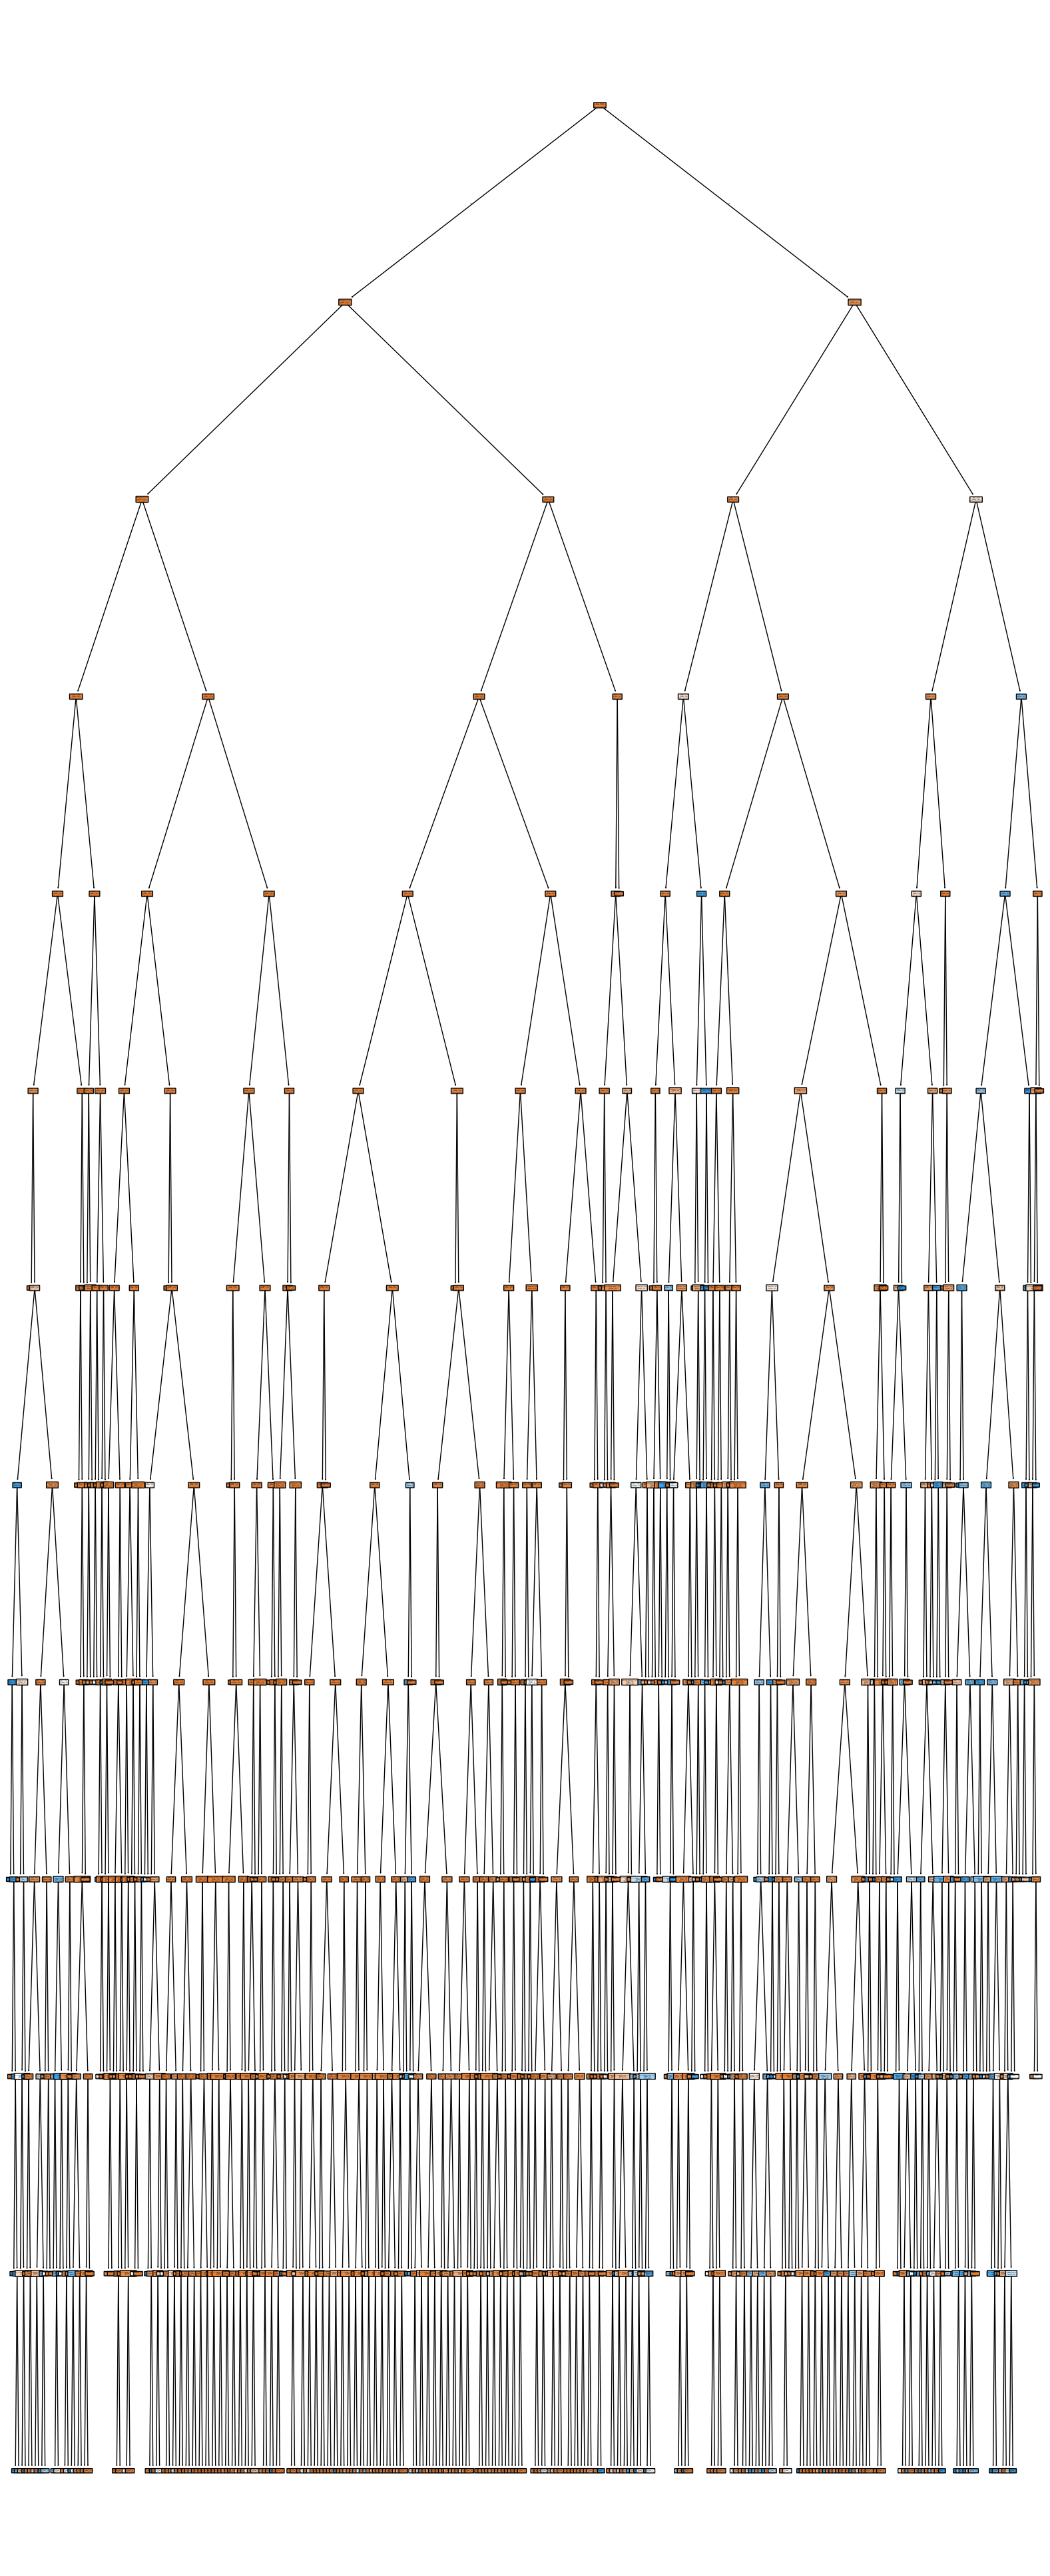

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt # Ensure plt is imported

plt.figure(figsize=(20, 50))
# Pass the fitted model (best_dt) to plot_tree
plot_tree(best_dt, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.show()

<ipython-input-67-2634647059>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')


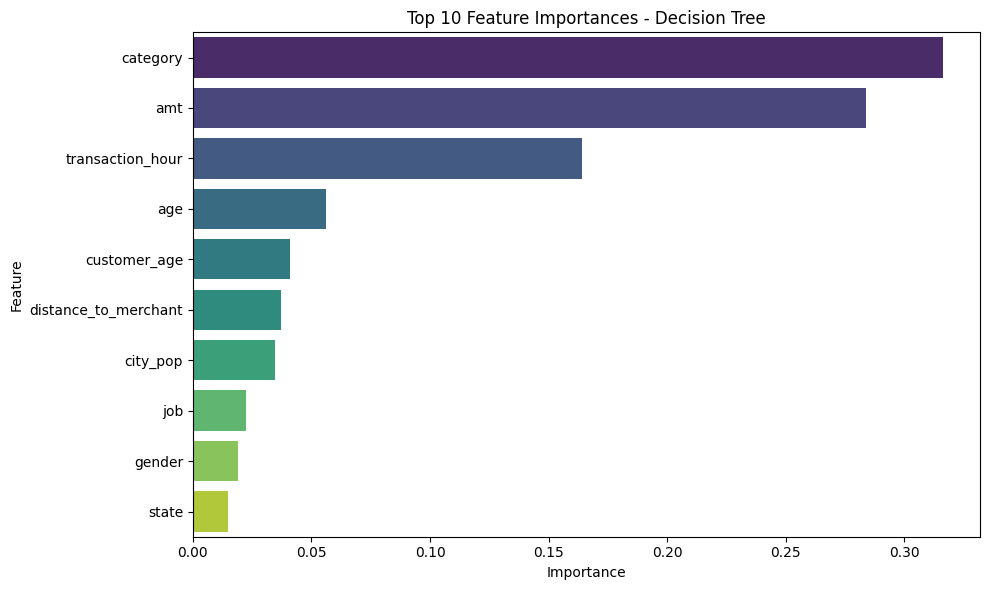

In [ ]:
# Train full-depth tree for feature importances
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

# Create a dataframe of feature importances
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_full.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate metrics
metrics = {
    "Accuracy": [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision": [
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_dt)
    ],
    "Recall": [
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_dt)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_dt)
    ]
}

# Create DataFrame for display
comparison_df = pd.DataFrame(metrics, index=["XGBoost", "Decision Tree"])
comparison_df

,Accuracy,Precision,Recall,F1 Score
XGBoost,0.999,0.954,0.818,0.881
Decision Tree,0.998,0.810,0.825,0.818
